# Task 4                    Exploratory Data Analysis

# ______________________________________Dhruv Pandey

## Problem:-Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysisof news headlines

# Stock to analyze and predict - SENSEX (S&P BSE SENSEX)

# 1.  sentimental analysis of news headlines

In [1]:
import pandas as pd

# Load Dataset

In [4]:
data=pd.read_csv('C://Users//Rahul//Desktop//Sparks//text_data.csv', encoding = "ISO-8859-1")

In [5]:
data

Date  Label                                               Top1  \
0     2000-01-03      0  A 'hindrance to operations': extracts from the...   
1     2000-01-04      0                                          Scorecard   
2     2000-01-05      0                  Coventry caught on counter by Flo   
3     2000-01-06      1                      Pilgrim knows how to progress   
4     2000-01-07      1                               Hitches and Horlocks   
...          ...    ...                                                ...   
4096  2016-06-27      0  Barclays and RBS shares suspended from trading...   
4097  2016-06-28      1  2,500 Scientists To Australia: If You Want To ...   
4098  2016-06-29      1                   Explosion At Airport In Istanbul   
4099  2016-06-30      1  Jamaica proposes marijuana dispensers for tour...   
4100  2016-07-01      1  A 117-year-old woman in Mexico City finally re...   

                                                   Top2  \
0                                             Scorecard   
1                                   The best lake scene   
2                    United's rivals on the road to Rio   
3                                   Thatcher facing ban   
4                        Beckham off but United survive   
...                                                 ...   
4096  Pope says Church should ask forgiveness from g...   
4097  The personal details of 112,000 French police ...   
4098  Yemeni former president: Terrorism is the offs...   
4099  Stephen Hawking says pollution and 'stupidity'...   
4100   IMF chief backs Athens as permanent Olympic host   

                                                   Top3  \
0                       Hughes' instant hit buoys Blues   
1                         Leader: German sleaze inquiry   
2         Thatcher issues defence before trial by video   
3               McIlroy calls for Irish fighting spirit   
4                               Breast cancer screening   
...                                                 ...   
4096  Poland 'shocked' by xenophobic abuse of Poles ...   
4097  S&amp;P cuts United Kingdom sovereign credit r...   
4098  UK must accept freedom of movement to access E...   
4099  Boris Johnson says he will not run for Tory pa...   
4100  The president of France says if Brexit won, so...   

                                                   Top4  \
0              Jack gets his skates on at ice-cold Alex   
1                                         Cheerio, boyo   
2         Police help Smith lay down the law at Everton   
3                       Leicester bin stadium blueprint   
4                                           Alan Parker   
...                                                 ...   
4096  There will be no second referendum, cabinet ag...   
4097                Huge helium deposit found in Africa   
4098  Devastated: scientists too late to captive bre...   
4099  Six gay men in Ivory Coast were abused and for...   
4100  British Man Who Must Give Police 24 Hours' Not...   

                                                   Top5  \
0                Chaos as Maracana builds up for United   
1                              The main recommendations   
2           Tale of Trautmann bears two more retellings   
3                        United braced for Mexican wave   
4               Guardian readers: are you all whingers?   
...                                                 ...   
4096      Scotland welcome to join EU, Merkel ally says   
4097  CEO of the South African state broadcaster qui...   
4098  British Labor Party leader Jeremy Corbyn loses...   
4099  Switzerland denies citizenship to Muslim immig...   
4100  100+ Nobel laureates urge Greenpeace to stop o...   

                                                   Top6  \
0     Depleted Leicester prevail as Elliott spoils E...   
1                                Has Cubie killed fees?   
2                                   England on the rack   
3  

# Splitting into Train and test according to date

In [6]:
train = data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']

# Removing all symbols and special characters

In [7]:
new_data=train.iloc[:,2:27]
new_data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)


In [8]:
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
new_data.columns= new_Index
new_data.head(5)

0  \
0  A  hindrance to operations   extracts from the...   
1                                          Scorecard   
2                  Coventry caught on counter by Flo   
3                      Pilgrim knows how to progress   
4                               Hitches and Horlocks   

                                    1  \
0                           Scorecard   
1                 The best lake scene   
2  United s rivals on the road to Rio   
3                 Thatcher facing ban   
4      Beckham off but United survive   

                                               2  \
0                Hughes  instant hit buoys Blues   
1                  Leader  German sleaze inquiry   
2  Thatcher issues defence before trial by video   
3        McIlroy calls for Irish fighting spirit   
4                        Breast cancer screening   

                                               3  \
0       Jack gets his skates on at ice cold Alex   
1                                  Cheerio  boyo   
2  Police help Smith lay down the law at Everton   
3                Leicester bin stadium blueprint   
4                                    Alan Parker   

                                             4  \
0       Chaos as Maracana builds up for United   
1                     The main recommendations   
2  Tale of Trautmann bears two more retellings   
3               United braced for Mexican wave   
4      Guardian readers  are you all whingers    

                                                   5  \
0  Depleted Leicester prevail as Elliott spoils E...   
1                             Has Cubie killed fees    
2                                England on the rack   
3  Auntie back in fashion  even if the dress look...   
4                                   Hollywood Beyond   

                                                 6  \
0                 Hungry Spurs sense rich pickings   
1                           Has Cubie killed fees    
2  Pakistan retaliate with call for video of Walsh   
3                    Shoaib appeal goes to the top   
4                               Ashes and diamonds   

                                                   7  \
0                  Gunners so wide of an easy target   
1                             Has Cubie killed fees    
2               Cullinan continues his Cape monopoly   
3  Hussain hurt by  shambles  but lays blame on e...   
4                   Whingers   a formidable minority   

                                                   8  \
0      Derby raise a glass to Strupar s debut double   
1  Hopkins  furious  at Foster s lack of Hannibal...   
2             McGrath puts India out of their misery   
3                      England s decade of disasters   
4                             Alan Parker   part two   

                                          9  ...  \
0  Southgate strikes  Leeds pay the penalty  ...   
1                    Has Cubie killed fees   ...   
2            Blair Witch bandwagon rolls on  ...   
3      Revenge is sweet for jubilant Cronje  ...   
4                 Thuggery  Toxins and Ties  ...   

                                                  15  \
0           Flintoff injury piles on woe for England   
1                               On the critical list   
2                        South Melbourne  Australia    
3  Putin admits Yeltsin quit to give him a head s...   
4                             Most everywhere   UDIs   

                                                  16  \
0  Hunters threaten Jospin with new battle of the...   
1                          The timing of their lives   
2                                    Necaxa  Mexico    
3         BBC worst hit as digital TV begins to bite   
4                       Most wanted   Chloe lunettes   

                                               17  \
0             Kohl s successor drawn into scandal   
1                                     Dear doctor   
2                             Real Madrid  Spain    
3    

# converting all into lower case

In [10]:
for index in new_Index:
    new_data[index]=new_data[index].str.lower()
new_data.head(1)

0          1  \
0  a  hindrance to operations   extracts from the...  scorecard   

                                 2                                         3  \
0  hughes  instant hit buoys blues  jack gets his skates on at ice cold alex   

                                        4  \
0  chaos as maracana builds up for united   

                                                   5  \
0  depleted leicester prevail as elliott spoils e...   

                                  6                                  7  \
0  hungry spurs sense rich pickings  gunners so wide of an easy target   

                                               8  \
0  derby raise a glass to strupar s debut double   

                                          9  ...  \
0  southgate strikes  leeds pay the penalty  ...   

                                         15  \
0  flintoff injury piles on woe for england   

                                                  16  \
0  hunters threaten jospin with new battle of the...   

                                    17                                    18  \
0  kohl s successor drawn into scandal  the difference between men and women   

                                    19  \
0  sara denver  nurse turned solicitor   

                                               20  \
0  diana s landmine crusade put tories in a panic   

                                                  21                22  \
0  yeltsin s resignation caught opposition flat f...  russian roulette   

         23                  24  
0  sold out  recovering a title  

[1 rows x 25 columns]

# combine into paragraph

In [11]:
' '.join(str(x) for x in new_data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [12]:
headlines = []
for row in range(0,len(new_data.index)):
    headlines.append(' '.join(str(x) for x in new_data.iloc[row,0:25]))


In [13]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# model fitting

In [21]:
countvector=CountVectorizer(ngram_range=(1,1))
traindataset=countvector.fit_transform(headlines)

In [22]:
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [23]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)


In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Accuracy

In [25]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[142  44]
 [ 11 181]]
0.8544973544973545
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       186
           1       0.80      0.94      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



# 2. stock price/performance prediction using numerical analysis of historical stock prices

In [37]:
import pandas_datareader as pdr
key="key"

In [38]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [40]:
df.to_csv('C://Users//Rahul//Desktop//Sparks//text_data.csv')

In [41]:
df=pd.read_csv('C://Users//Rahul//Desktop//Sparks//text_data.csv')

In [42]:
df.head()

symbol                       date   close     high     low    open  \
0   AAPL  2015-10-19 00:00:00+00:00  111.73  111.750  110.11  110.80   
1   AAPL  2015-10-20 00:00:00+00:00  113.77  114.170  110.82  111.34   
2   AAPL  2015-10-21 00:00:00+00:00  113.76  115.580  113.70  114.00   
3   AAPL  2015-10-22 00:00:00+00:00  115.50  115.500  114.10  114.33   
4   AAPL  2015-10-23 00:00:00+00:00  119.08  119.228  116.33  116.70   

     volume   adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  \
0  29759153  25.809095  25.813715  25.434883  25.594270  119036612      0.0   
1  48967763  26.280326  26.372724  25.598890  25.719007  195871052      0.0   
2  42326974  26.278016  26.698427  26.264156  26.333455  169307896      0.0   
3  41654089  26.679947  26.679947  26.356554  26.409683  166616356      0.0   
4  59366914  27.506910  27.541098  26.871673  26.957142  237467656      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [43]:
df1=df.reset_index()['close']

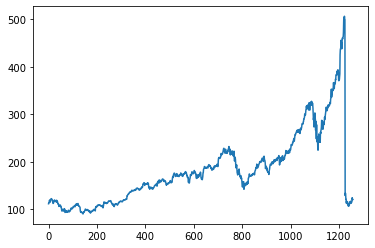

In [44]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [45]:
import numpy as np


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
df1.shape

(1258, 1)

In [48]:
df1

array([[0.05144919],
       [0.05635598],
       [0.05633193],
       ...,
       [0.07398677],
       [0.07420325],
       [0.07304871]])

In [59]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [60]:
training_size,test_size

(817, 441)

In [61]:
train_data

array([[0.05144919],
       [0.05635598],
       [0.05633193],
       [0.06051714],
       [0.06912808],
       [0.05998797],
       [0.05823211],
       [0.06958509],
       [0.07261575],
       [0.0701383 ],
       [0.07417919],
       [0.07752255],
       [0.07615153],
       [0.07355382],
       [0.07389056],
       [0.07271197],
       [0.06357186],
       [0.06198437],
       [0.0610463 ],
       [0.05291642],
       [0.05733013],
       [0.05616356],
       [0.06482261],
       [0.06840649],
       [0.06965725],
       [0.06592904],
       [0.06864702],
       [0.06660253],
       [0.06607336],
       [0.06725195],
       [0.06494287],
       [0.06239327],
       [0.05979555],
       [0.06900782],
       [0.06720385],
       [0.06708358],
       [0.06080577],
       [0.06212868],
       [0.05493686],
       [0.05325316],
       [0.04846663],
       [0.05051112],
       [0.04483464],
       [0.03773903],
       [0.0408659 ],
       [0.04062538],
       [0.04394468],
       [0.042

In [84]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [85]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [86]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [87]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [88]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [98]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 552ms/step - loss: 0.0092 - val_loss: 0.0557
Epoch 2/100
12/12 [==============================] - 3s 289ms/step - loss: 0.0022 - val_loss: 0.0217
Epoch 3/100
12/12 [==============================] - 3s 220ms/step - loss: 7.4274e-04 - val_loss: 0.0239
Epoch 4/100
12/12 [==============================] - 3s 241ms/step - loss: 5.0125e-04 - val_loss: 0.0211
Epoch 5/100
12/12 [==============================] - 3s 224ms/step - loss: 4.4983e-04 - val_loss: 0.0204
Epoch 6/100
12/12 [==============================] - 3s 257ms/step - loss: 3.6818e-04 - val_loss: 0.0198
Epoch 7/100
12/12 [==============================] - 3s 244ms/step - loss: 3.4404e-04 - val_loss: 0.0193
Epoch 8/100
12/12 [==============================] - 3s 241ms/step - loss: 3.1911e-04 - val_loss: 0.0186
Epoch 9/100
12/12 [==============================] - 3s 218ms/step - loss: 3.1015e-04 - val_loss: 0.0180
Epoch 10/100
12/12 [==============================] - 3s 274ms/

In [101]:
import tensorflow as tf


In [102]:
tf.__version__

'2.3.1'

In [103]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [104]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [105]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

156.04548530903782

In [106]:
math.sqrt(mean_squared_error(ytest,test_predict))

270.87573598751356

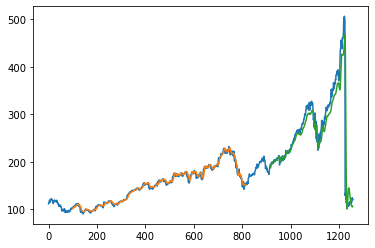

In [107]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [108]:
len(test_data)

441

In [109]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [110]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [111]:
temp_input

[0.5478532772098617,
 0.5481900180396873,
 0.5474443776307878,
 0.5568490679494889,
 0.5604329524954901,
 0.5647143716175587,
 0.5579795550210462,
 0.5800601322910404,
 0.584774503908599,
 0.6101022248947685,
 0.6313890559230306,
 0.5906434155141311,
 0.5976187612748045,
 0.607696933253157,
 0.6295610342754059,
 0.6283824413710162,
 0.628719182200842,
 0.6238845460012028,
 0.6458929645219482,
 0.6643174984966926,
 0.6487552615754661,
 0.6602525556223691,
 0.6332892363199039,
 0.6528923631990378,
 0.6601563439567049,
 0.6584966927239928,
 0.6584966927239928,
 0.6819242333132893,
 0.6791340950090199,
 0.7000120264582081,
 0.7039567047504509,
 0.7055682501503309,
 0.7013108839446784,
 0.7165123271196634,
 0.7229344558027659,
 0.7113650030066145,
 0.7094888755261575,
 0.7290198436560433,
 0.7159591100420926,
 0.7185808779314491,
 0.6759831629585087,
 0.673770294648226,
 0.6948887552615755,
 0.6799037883343355,
 0.6971016235718581,
 0.7081659651232712,
 0.8050511124473845,
 0.83081178592904

In [112]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.04393861]
101
1 day input [0.54819002 0.54744438 0.55684907 0.56043295 0.56471437 0.55797956
 0.58006013 0.5847745  0.61010222 0.63138906 0.59064342 0.59761876
 0.60769693 0.62956103 0.62838244 0.62871918 0.62388455 0.64589296
 0.6643175  0.64875526 0.66025256 0.63328924 0.65289236 0.66015634
 0.65849669 0.65849669 0.68192423 0.6791341  0.70001203 0.7039567
 0.70556825 0.70131088 0.71651233 0.72293446 0.711365   0.70948888
 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876
 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118
 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105 0.86999399
 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943
 0.97929044 0.99360192 0.98366807 1.         0.98544799 0.9834997
 0.09308479 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096
 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113
 0.04810583 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661
 0.0527721  0.05921828 0.05712568 0.

9 day output [[0.0234981]]
10 day input [0.63138906 0.59064342 0.59761876 0.60769693 0.62956103 0.62838244
 0.62871918 0.62388455 0.64589296 0.6643175  0.64875526 0.66025256
 0.63328924 0.65289236 0.66015634 0.65849669 0.65849669 0.68192423
 0.6791341  0.70001203 0.7039567  0.70556825 0.70131088 0.71651233
 0.72293446 0.711365   0.70948888 0.72901984 0.71595911 0.71858088
 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597
 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782
 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638
 0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 

17 day output [[0.02111621]]
18 day input [0.64589296 0.6643175  0.64875526 0.66025256 0.63328924 0.65289236
 0.66015634 0.65849669 0.65849669 0.68192423 0.6791341  0.70001203
 0.7039567  0.70556825 0.70131088 0.71651233 0.72293446 0.711365
 0.70948888 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029
 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.04393861 0.04501975
 0.04396834 0.04138206

25 day output [[0.02763463]]
26 day input [0.65849669 0.68192423 0.6791341  0.70001203 0.7039567  0.70556825
 0.70131088 0.71651233 0.72293446 0.711365   0.70948888 0.72901984
 0.71595911 0.71858088 0.67598316 0.67377029 0.69488876 0.67990379
 0.69710162 0.70816597 0.80505111 0.83081179 0.83781118 0.8416356
 0.87858088 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632
 0.88825015 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044
 0.99360192 0.98366807 1.         0.98544799 0.9834997  0.09308479
 0.10544799 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477
 0.0556825  0.05209862 0.06016837 0.06061335 0.0524113  0.04810583
 0.03968731 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721
 0.05921828 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243
 0.05488876 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677
 0.07420325 0.07304871 0.04393861 0.04501975 0.04396834 0.04138206
 0.03799503 0.03440403 0.03100158 0.02800153 0.02549546 0.0234981
 0.02198692 0.02092012 

In [113]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [114]:
import matplotlib.pyplot as plt

In [115]:
len(df1)

1258

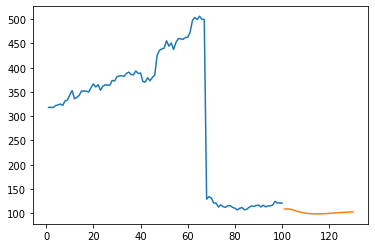

In [116]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

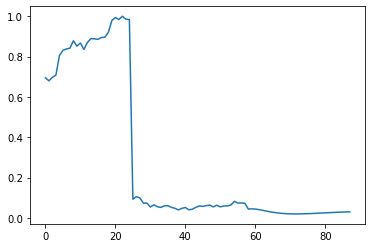

In [117]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [118]:
df3=scaler.inverse_transform(df3).tolist()

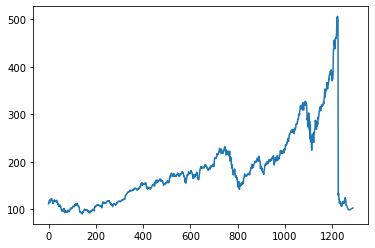

In [119]:
plt.plot(df3)